## xgb 交叉验证的使用

参考：
- [API](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training)
- [github demo](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/cross_validation.py)


In [1]:
# -*- coding:utf-8 -*-
from __future__ import print_function
from __future__ import division

import numpy as np
import xgboost as xgb
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../..')
import my_utils
import time

In [2]:
column_names = ['t_city', 't_tier', 't_network', 't_sex', 't_year',
                'goldCreateTime', 'sex', 'birthYear', 
                'frequentCity', 'mostFrequentVvPlatform', 'lastAccessTimeOfVv', 'accumulateVvDaysOfLastMonth', 'shiKan', 
                'freeOrder', 'payVod', 'notPayOrder', 'authLog', 'phoneAu', 
               ]

data = load_svmlight_file('../../raw_data/20171222_044846')
features = data[0].toarray()
labels = data[1]
print('features.shape=%s' % str(features.shape))
print('labels.shape=%s' % str(labels.shape))

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=3)

train_data = xgb.DMatrix(X_train, y_train, feature_names=column_names)
test_data = xgb.DMatrix(X_test, y_test, feature_names=column_names)

## xgb.cv() 函数的使用

In [3]:
# 交叉验证
tic = time.time()
num_round = 500
params = {'booster': 'gbtree',
          'objective': 'binary:logistic',
          'learning_rate': 0.1,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'eta': 0.1,
          'max_depth': 9,
          'min_child_weight': 1,
          'gamma': 0.0,
          'silent': 1,
          'seed': 0,
          'eval_metric': 'auc',
          'njob':24
          }

cvresult = xgb.cv(params, train_data, num_boost_round=num_round, nfold=5, metrics='auc', early_stopping_rounds=30, show_stdv=True)
print('Cost time %gs' % (time.time() - tic))

Cost time 366.855s


In [4]:
# 返回的 cvresult 是一个 DataFrame,每一次迭代都进行交叉验证
# cvresult 的行数为最优的迭代次数，后面继续迭代的结果不会展示
cvresult

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.500000,0.000000,0.500000,0.000000
1,0.500000,0.000000,0.500000,0.000000
2,0.500000,0.000000,0.500000,0.000000
3,0.500000,0.000000,0.500000,0.000000
4,0.500000,0.000000,0.500000,0.000000
5,0.500000,0.000000,0.500000,0.000000
6,0.499966,0.000068,0.500299,0.000598
7,0.499949,0.000068,0.500586,0.000718
8,0.499769,0.000295,0.501672,0.001282
9,0.500852,0.001877,0.502804,0.003460


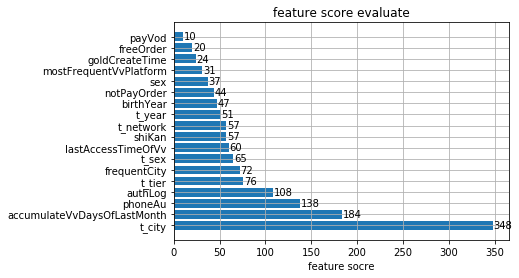

14720 93.0
Saved result to threshold_result_171225_xgboost.csv


,topn,threshold,precision,putin,n_convert,n_miss
0,5,0.016898,0.009511,736,7.0,86.0
1,10,0.014170,0.010190,1472,15.0,78.0
2,15,0.012854,0.007699,2208,17.0,76.0
3,20,0.012023,0.009171,2944,27.0,66.0
4,25,0.011645,0.007880,3680,29.0,64.0
5,30,0.011310,0.007246,4416,32.0,61.0
6,35,0.010970,0.007182,5152,37.0,56.0
7,40,0.010680,0.006624,5888,39.0,54.0
8,45,0.010490,0.006793,6624,45.0,48.0
9,50,0.010325,0.006522,7360,48.0,45.0


In [5]:
# 预测
best_round = cvresult.shape[0]  # 根据交叉验证中获取最好的迭代次数（最优模型）
best_model = xgb.train(params, train_data, best_round)
all_feature_score = my_utils.feature_analyze(best_model)
y_pred_prob = best_model.predict(test_data)

# 输出预测结果
topns = range(0 ,100, 5)[1:] + [100]
save_path = 'threshold_result_171225_xgboost.csv'
df_threshold = my_utils.get_threshold_result(y_test, y_pred_prob, topns, save_path=save_path)
df_threshold